### Classifying Songs by Decade
The goal of this project to use audio features of a track to determine which decade it was released in.

In [1]:
import pandas as pd
import numpy as np

# Read csv data into dataframe
df = pd.read_csv('data/music_data.csv')
df

,id,name,decade,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,time_signature,valence,date_match
0,1j61kYCfWXc89cSuQRPt9V,Act III: Bella figlia dell'amore - Quartet,1900,0.9930,0.244,216693,0.1400,0.003990,1,0.1070,-19.985,1,1990,0.0513,172.858,3,0.398,0
1,2WJCZO6t2Ehe5XglyqFkTz,La Sonnambula: Ah! non credea mirarti (Recorde...,1900,0.9930,0.242,278000,0.0706,0.037500,0,0.3710,-22.164,1,1998-01-01,0.0478,76.446,4,0.139,0
2,59Bml7VuTWEoSeZRrd3glh,Act II: Chi mi frena in tal momento?,1900,0.9940,0.304,240907,0.2720,0.442000,1,0.2580,-15.062,1,1990,0.0473,123.718,4,0.358,0
3,0UwWSJx2OvlrGxu8Fd2qlH,La Sonnambula: Ah! non giunge (Recorded 1904),1900,0.9950,0.557,153000,0.0390,0.794000,10,0.3660,-22.831,1,1998-01-01,0.0779,127.243,4,0.460,0
4,4g8zryHn6KtxyEVOSYTjZn,Rigoletto: Caro nome (Recorded 1911),1900,0.9760,0.231,258000,0.0265,0.000079,4,0.3700,-25.757,1,1989-01-01,0.0500,74.851,4,0.175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23959,2QrMuaZUACwUpmIzmqRE9l,123,2020,0.0167,0.457,170168,0.5770,0.000037,2,0.1280,-5.625,1,2017-05-12,0.0275,135.889,4,0.202,0
23960,3fAnJdzLO2f3Z1nsOl8rco,Dragging My Life Into a Dream,2020,0.0950,0.457,191920,0.6930,0.002130,6,0.0985,-6.173,1,2022-04-29,0.0375,201.953,4,0.663,1
23961,6RiI88pDWXUBJcRPuNkjHK,Hire,2020,0.1670,0.439,175418,0.5800,0.000037,7,0.0897,-7.602,1,2019-02-01,0.0304,164.088,4,0.154,0
23962,5hqYMiXobcaHQxB21rTlzD,Ideal World,2020,0.5890,0.745,166329,0.2960,0.009390,2,0.0949,-7.844,1,2015-06-02,0.0309,146.830,3,0.566,0


There are signficantly more tracks from recent years. To get a more even distribution, I binned into the data into broader categories: [1900, 1960], [1970, 2000], and [2010, 2020]

In [2]:
df.describe()

,decade,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,date_match
count,23964.000000,23964.000000,23964.000000,2.396400e+04,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000,23964.000000
mean,1974.804707,0.450374,0.552111,2.173997e+05,0.532083,0.173088,5.148306,0.196990,-10.229097,0.702846,0.076074,120.020011,3.897888,0.540507,0.323026
std,37.011186,0.389054,0.166395,1.080707e+05,0.262826,0.311230,3.540378,0.160505,4.950717,0.457014,0.104928,29.662528,0.411065,0.255165,0.467642
min,1900.000000,0.000001,0.000000,2.346700e+04,0.000020,0.000000,0.000000,0.013700,-47.854000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1950.000000,0.044400,0.441000,1.680000e+05,0.310000,0.000002,2.000000,0.097700,-12.803000,0.000000,0.034000,97.985000,4.000000,0.342000,0.000000
50%,1980.000000,0.376000,0.566000,1.982000e+05,0.543000,0.000696,5.000000,0.132000,-9.434500,1.000000,0.044100,118.742000,4.000000,0.546000,0.000000
75%,2010.000000,0.875000,0.674000,2.430302e+05,0.753000,0.154000,8.000000,0.253000,-6.618750,1.000000,0.068800,137.384000,4.000000,0.752000,1.000000
max,2020.000000,0.996000,0.978000,3.572014e+06,1.000000,1.000000,11.000000,0.998000,4.142000,1.000000,0.967000,221.020000,5.000000,1.000000,1.000000


In [3]:
df["decade"].value_counts().sort_index()

1900     898
1910     551
1920    1779
1930    1484
1940    1133
1950    1545
1960    1876
1970    1953
1980    1983
1990    2053
2000    1771
2010    1790
2020    5148
Name: decade, dtype: int64

In [4]:
unique, counts = np.unique(np.digitize(df["decade"], bins=[1960, 2000]), return_counts=True)
counts

array([7390, 7865, 8709], dtype=int64)

In [5]:
df["binned_decade"] = np.digitize(df["decade"], bins=[1960, 2000])
df

,id,name,decade,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,time_signature,valence,date_match,binned_decade
0,1j61kYCfWXc89cSuQRPt9V,Act III: Bella figlia dell'amore - Quartet,1900,0.9930,0.244,216693,0.1400,0.003990,1,0.1070,-19.985,1,1990,0.0513,172.858,3,0.398,0,0
1,2WJCZO6t2Ehe5XglyqFkTz,La Sonnambula: Ah! non credea mirarti (Recorde...,1900,0.9930,0.242,278000,0.0706,0.037500,0,0.3710,-22.164,1,1998-01-01,0.0478,76.446,4,0.139,0,0
2,59Bml7VuTWEoSeZRrd3glh,Act II: Chi mi frena in tal momento?,1900,0.9940,0.304,240907,0.2720,0.442000,1,0.2580,-15.062,1,1990,0.0473,123.718,4,0.358,0,0
3,0UwWSJx2OvlrGxu8Fd2qlH,La Sonnambula: Ah! non giunge (Recorded 1904),1900,0.9950,0.557,153000,0.0390,0.794000,10,0.3660,-22.831,1,1998-01-01,0.0779,127.243,4,0.460,0,0
4,4g8zryHn6KtxyEVOSYTjZn,Rigoletto: Caro nome (Recorded 1911),1900,0.9760,0.231,258000,0.0265,0.000079,4,0.3700,-25.757,1,1989-01-01,0.0500,74.851,4,0.175,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23959,2QrMuaZUACwUpmIzmqRE9l,123,2020,0.0167,0.457,170168,0.5770,0.000037,2,0.1280,-5.625,1,2017-05-12,0.0275,135.889,4,0.202,0,2
23960,3fAnJdzLO2f3Z1nsOl8rco,Dragging My Life Into a Dream,2020,0.0950,0.457,191920,0.6930,0.002130,6,0.0985,-6.173,1,2022-04-29,0.0375,201.953,4,0.663,1,2
23961,6RiI88pDWXUBJcRPuNkjHK,Hire,2020,0.1670,0.439,175418,0.5800,0.000037,7,0.0897,-7.602,1,2019-02-01,0.0304,164.088,4,0.154,0,2
23962,5hqYMiXobcaHQxB21rTlzD,Ideal World,2020,0.5890,0.745,166329,0.2960,0.009390,2,0.0949,-7.844,1,2015-06-02,0.0309,146.830,3,0.566,0,2


I stored the release_date of each track along with the decade of the artist. Only 32.3% percent having matching decades. I chose to trust decade rather than Spotify's release_date after realizing some of the recorded release dates were after the death of the artist.

In [6]:
# Only a small percentage of the track release_date match the decade
match_percent = sum(m == 1 for m in df["date_match"])/len(df["date_match"]) * 100
print(f"{match_percent:.2f}%")

32.30%


Again we can see that most of the songs are from 2020 (binned_decade is more evenly distributed). Danceability is somewhat normally distributed around 0.6 but it is skewed towards the smaller values with a longer left tail. Looking at the instrumentalness and speechiness bar chart, we can also tell that most tracks contain vocals but not much nonmusical speaking. 

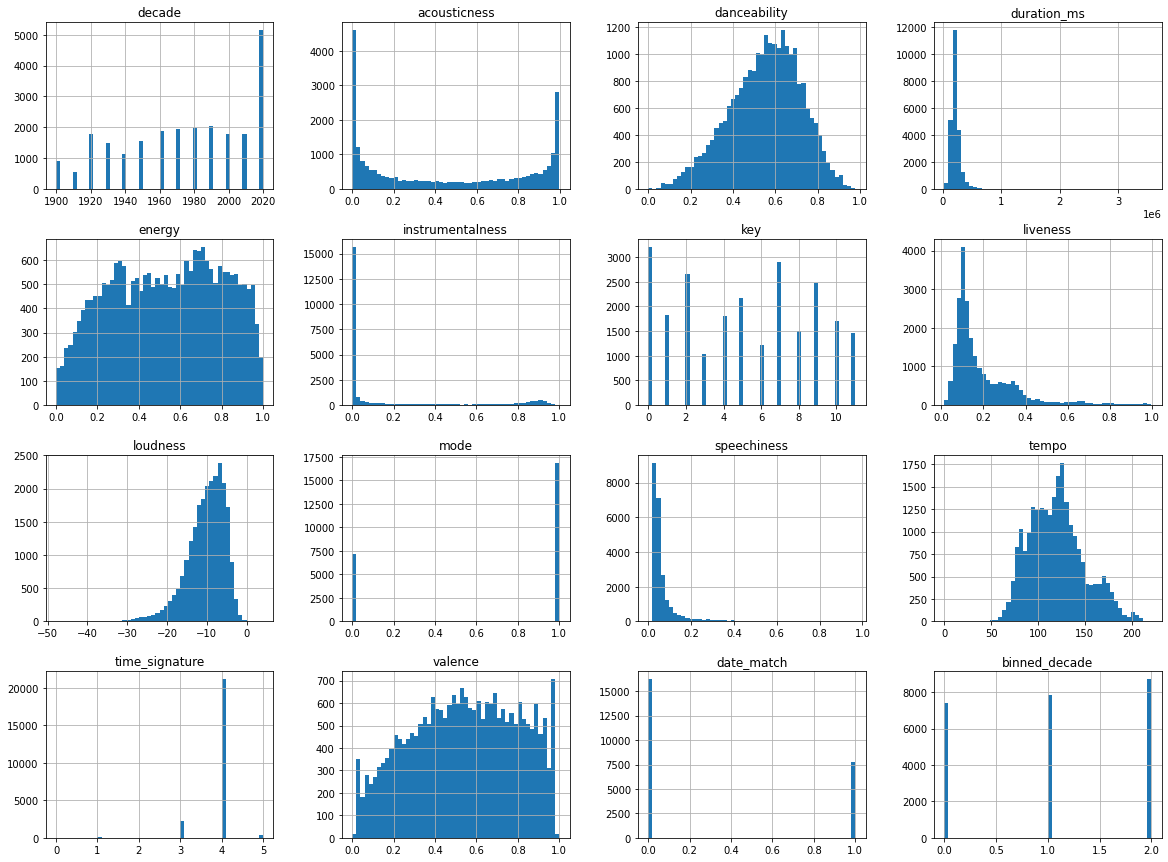

In [7]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

We can look for correlations using `scatter_matrix`: <br>
- Loudness negatively correlated with acousticness
- Loudness is positively correlated with energy
- Danceability increases wth valence (makes sense since people prefer dancing to more positive music)

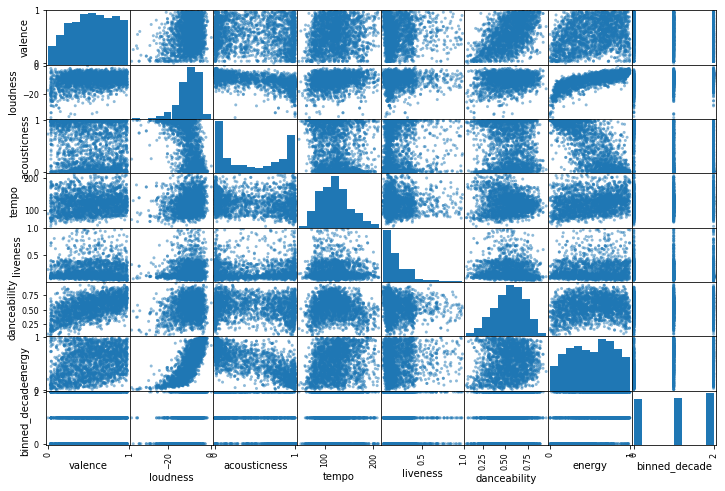

In [8]:
from pandas.plotting import scatter_matrix

# Use a sample of the data to visualize
small_df = df.sample(frac=0.1, replace=True, random_state=1)
scatter_matrix(small_df[["valence", "loudness", "acousticness", "tempo", "liveness", "danceability", "energy", "binned_decade"]], figsize=(12,8))
plt.show()

In [9]:
df.columns

Index(['id', 'name', 'decade', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'release_date', 'speechiness', 'tempo', 'time_signature', 'valence',
       'date_match', 'binned_decade'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

# Creating training and testing sets
X = np.array(df.drop(columns=["decade", "binned_decade", "release_date", "id", "name", "date_match"]))
y = np.array(df["binned_decade"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

(19171, 13)
(19171,)


I wanted to start by using RandomForestClassifier since it is easy to implement and understand.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)

# Using cross validation to evaluate performance and ability to generalize
scores = cross_val_score(rnd_clf, X_train, y_train, cv=10)
print(f"Accuracy with cross validation: {(scores.mean()*100):.1f}%")

Accuracy with cross validation: 78.6%


The accuracy with only three classes is reasonably good, considering the model's hyperparameters have not been changed from their default values. We can compare this model to if we were use decade column which contains thirteen classes.

In [13]:
X_train, X_test, hard_y, y_test = train_test_split(X, np.array(df["decade"]), test_size=0.2, random_state=42)

rnd_hard = RandomForestClassifier()
rnd_hard.fit(X_train, hard_y)

scores = cross_val_score(rnd_hard, X_train, hard_y, cv=10)
print(f"Accuracy with 13 classes: {(scores.mean()*100):.1f}%")

Accuracy with 13 classes: 38.5%


The score is better than randomly guessing but much worse than before. Going back to using binned_decade as the labels, we can evalute how much overfitting is occurring.

In [14]:
from sklearn.metrics import accuracy_score

# Accuracy score without cross validation
train_pred = rnd_clf.predict(X_train)
print(f"Accuracy with training set: {accuracy_score(train_pred, y_train)*100:.1f}%")

Accuracy with training set: 97.7%


In [15]:
min_depth = min([estimator.tree_.max_depth for estimator in rnd_clf.estimators_])
max_depth = max([estimator.tree_.max_depth for estimator in rnd_clf.estimators_])
print(f"[{min_depth}, {max_depth}]")

[25, 36]


In [16]:
rnd_clf = RandomForestClassifier(max_depth=25)
rnd_clf.fit(X_train, y_train)

scores = cross_val_score(rnd_clf, X_train, y_train, cv=10)
print(f"Accuracy with cross validation: {(scores.mean()*100):.1f}%")

Accuracy with cross validation: 78.6%


In [17]:
from sklearn.model_selection import GridSearchCV

max_depth = np.arange(10, 35, 5)
min_samples_leaf = np.arange(100, 600, 100)
n_estimators = np.arange(300, 600, 100)

# To find the best hyperparameters
# Takes very long so difficult to properly judge the model
parameters = {"max_depth":max_depth, "min_samples_leaf":min_samples_leaf, "n_estimators":n_estimators}

rnd_clf = RandomForestClassifier()
clf = GridSearchCV(rnd_clf, parameters, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([10, 15, 20, 25, 30]),
                         'min_samples_leaf': array([100, 200, 300, 400, 500]),
                         'n_estimators': array([300, 400, 500])},
             verbose=1)

In [18]:
clf.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=100, n_estimators=500)

In [19]:
clf.best_score_

0.6930780180625012

I wanted to take a closer look at how `max_depth` affects the training and validation set accuracy.

In [77]:
from IPython.display import clear_output

# To save time use validation set
X_val = X_train[:3000]
y_val = y_train[:3000]

len_training = X_train.shape[0]-3000

train_acc = []
val_acc = []
for m in range(2, 40, 2):
    print (f"Current Iteration: {m}")
    
    rnd_clf = RandomForestClassifier(max_depth=m)
    rnd_clf.fit(X_train[len_training:], y_train[len_training:])
    
    train_pred = rnd_clf.predict(X_train)
    val_pred = rnd_clf.predict(X_val)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    val_acc.append(accuracy_score(y_val, val_pred))
    
    clear_output(wait=True)

Current Iteration: 38


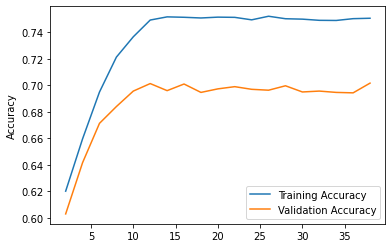

In [78]:
m = np.arange(2, 40, 2)
plt.plot(m, train_acc,  label="Training Accuracy")
plt.plot(m, val_acc, label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

RandomForest tends to especially overfit -> use SVM classifier

In [86]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Need to scale the data before using SVC
svc_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC(random_state=42))])
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

In [87]:
scores = cross_val_score(svc_clf, X_train, y_train, cv=10)

print(f"Accuracy with cross validation: {(scores.mean()*100):.1f}%")

Accuracy with cross validation: 70.9%
